In [42]:
import zarr
import napari
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from pathlib import Path
import numpy as np

# Display zarr information

In [38]:
zero_level_res = [1, 1, 1]  # zxy resolution, in microns
res_level = 2
project_path = "/Users/thomasathey/Documents/mimlab/mouselight/brainlit_parent/brainlit/experiments/sriram/data/"  # "E:\\Projects\\KolodkinLab\\Sriram\\brainlit-tracing\\brainlit\\experiments\\sriram\\data\\"

res_level_res = [
    zero_level_res[0],
    2**2 * zero_level_res[1],
    2**2 * zero_level_res[2],
]
project_path = Path(project_path)
ome_zarr_0_path = project_path / "fg_ome.zarr" / "0"
ome_zarr_res_path = project_path / "fg_ome.zarr" / str(res_level)

z0 = zarr.open_array(ome_zarr_0_path)
print(f"Full resolution info")
print("*********************")
print(z0.info)


zr = zarr.open_array(ome_zarr_res_path)
print(f"Specified resolution info")
print("*********************")
print(zr.info)

Full resolution info
*********************
Type               : zarr.core.Array
Data type          : uint16
Shape              : (40, 1998, 2009)
Chunk shape        : (10, 200, 200)
Order              : C
Read-only          : False
Compressor         : None
Store type         : zarr.storage.DirectoryStore
No. bytes          : 321118560 (306.2M)
No. bytes stored   : 281
Storage ratio      : 1142770.7
Chunks initialized : 4/440

Specified resolution info
*********************
Type               : zarr.core.Array
Data type          : uint16
Shape              : (40, 495, 502)
Chunk shape        : (10, 200, 200)
Order              : C
Read-only          : False
Compressor         : None
Store type         : zarr.storage.DirectoryStore
No. bytes          : 19879200 (19.0M)
No. bytes stored   : 279
Storage ratio      : 71251.6
Chunks initialized : 4/36



# Select data

In [32]:
region = zr[:, :300, :300]  # get upper left cutout
mip = np.amax(region, axis=0)  # take maximum along first axis for coronal mip

# Display with pyplot

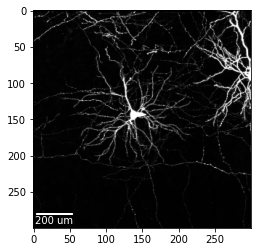

In [46]:
fig, ax = plt.subplots()
ax.imshow(mip, cmap="gray")

npix = 50
size = npix * res_level_res[1]
scale_label = f"{size} um"
scalebar = AnchoredSizeBar(
    ax.transData,
    npix,
    scale_label,
    "lower left",
    pad=0.1,
    color="white",
    frameon=False,
    size_vertical=1,
)
plt.gca().add_artist(scalebar)
plt.show()

# Display with napari

In [47]:
v = napari.Viewer()
v.add_image(mip, scale=res_level_res[1:])

v.scale_bar.visible = True
v.scale_bar.unit = "um"